In [2]:
from pandas import read_csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shapely.wkt
import geopandas as gpd
import contextily as cx
# import constants as c

os.chdir('C:/SynthFirm')

In [ ]:
synthfirm_all = read_csv('outputs_national/synthetic_firms_v2.csv')
national_map = gpd.read_file('inputs_national/national_freight.geojson')
# mesozone_id_lookup = read_csv('inputs/zonal_id_lookup_final.csv')

# lehd_validation = read_csv('inputs/LEHD_employment.csv')
national_map.head(5)

C:\Users\xiaodanxu\AppData\Local\Temp\2\ipykernel_29152\1877819899.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  synthfirm_all = read_csv('outputs_national/synthetic_firms_v2.csv')


In [ ]:
print(synthfirm_all.columns)
firm_by_zone = synthfirm_all.groupby(['MESOZONE']).agg({'BusID':'count',
                                                       'Emp':'sum'})
firm_by_zone = firm_by_zone.reset_index()
firm_by_zone.columns = ['MESOZONE', 'firm_count', 'employment_count']
firm_by_zone.head(5)

print(firm_by_zone[['firm_count', 'employment_count']].sum())

In [4]:
# print(mesozone_id_lookup.columns)
# firm_by_zone = pd.merge(firm_by_zone, mesozone_id_lookup, on = 'MESOZONE', how = 'left')
# firm_by_zone.head(5)

Index(['Unnamed: 0', 'GEOID', 'CBPZONE', 'MESOZONE', 'FAFID', 'FAFNAME'], dtype='object')


,MESOZONE,firm_count,employment_count,Unnamed: 0,GEOID,CBPZONE,FAFID,FAFNAME
0,1,31,93.675473,6796,480019501001,48001,489,Rest of TX
1,2,29,378.301451,3452,480019501002,48001,489,Rest of TX
2,3,29,248.507276,2359,480019501003,48001,489,Rest of TX
3,4,27,184.409939,3732,480019504011,48001,489,Rest of TX
4,5,30,173.476260,3068,480019504021,48001,489,Rest of TX


In [5]:
# firm_in_study_area = firm_by_zone.loc[firm_by_zone['FAFID'].isin([481, 488, 489])]
# print(firm_in_study_area.firm_count.sum())
# # sf_map_with_firm = sf_map.merge(firm_in_austin, on='MESOZONE', how='inner')
# # sf_map_with_firm.head(5)
# synthfirm_in_study_area = synthfirm_all.loc[synthfirm_all['MESOZONE'] < 20000]
# print(synthfirm_in_study_area.Emp.sum())
# print(len(synthfirm_all.Industry_NAICS6_Make.unique()))
# print(len(synthfirm_in_study_area.Industry_NAICS6_Make.unique()))

# synthfirm_in_study_area.head(5)

257646
3050920.0008009886
409
399


,CBPZONE,FAFZONE,esizecat,Industry_NAICS6_Make,Commodity_SCTG,Emp,BusID,MESOZONE
1015,48061,489,1,1111A0,3,1.0,1016,1967
1016,48119,489,1,1111A0,3,1.0,1017,2416
1017,48279,489,1,1111A0,3,1.0,1018,3844
1071,48453,481,1,1111A0,3,1.0,1072,5955
1075,48115,489,1,1111A0,3,1.0,1076,2395


3050920.0008009886


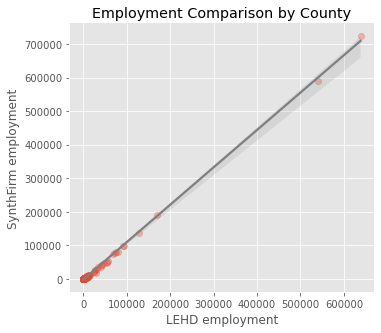

In [8]:
# compare to LEHD data
#lehd_validation.head(5)
lehd_firm_by_county = lehd_validation.loc[lehd_validation['industry'] == '0']
firm_in_study_area_by_county = firm_in_study_area.groupby('CBPZONE')[['employment_count']].sum()
firm_in_study_area_by_county = firm_in_study_area_by_county.reset_index()
# print(firm_in_study_area_by_county.head(5))

lehd_firm_by_county = lehd_firm_by_county.groupby('geography')[['EmpS']].mean()
lehd_firm_by_county = lehd_firm_by_county.reset_index()
# print(lehd_firm_by_county.head(5))
firm_comparison_by_county = pd.merge(lehd_firm_by_county, 
                                     firm_in_study_area_by_county,
                                     left_on = 'geography',
                                     right_on = 'CBPZONE',
                                     how = 'inner')
firm_comparison_by_county.columns = ['County', 'LEHD employment', 'CBPZONE', 'SynthFirm employment']
print(firm_comparison_by_county['SynthFirm employment'].sum())
firm_comparison_by_county.head(5)
plt.style.use('ggplot')
g = sns.lmplot(
    data=firm_comparison_by_county,
    x="LEHD employment", y="SynthFirm employment", 
    height=4.5, aspect = 1.2, line_kws={'color': 'grey'}, scatter_kws = {'alpha':0.3})
plt.title('Employment Comparison by County')
plt.savefig('plots/austin_emp_by_county_validation.png', dpi = 200,
           bbox_inches = 'tight')

3076348.7500000005
3050920.0008009886


/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_15812/2640847542.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthfirm_in_study_area.loc[:, 'Industry_NAICS6_Make'] = synthfirm_in_study_area.loc[:, 'Industry_NAICS6_Make'].astype(str)
/var/folders/w6/7qcyt43n21ddydhdfdslrp7c0000gp/T/ipykernel_15812/2640847542.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthfirm_in_study_area.loc[:, 'NAICS2'] = synthfirm_in_study_area.loc[:, 'Industry_NAICS6_Make'].str[:2]
/var/folders/w6/7qcyt43n

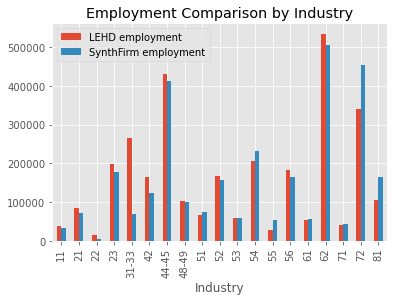

In [15]:
# compare to LEHD data
#lehd_validation.head(5)
industry_lookup = {'11':'11', '21':'21', '22':'22', '23':'23',
                   '31':'31-33', '32':'31-33', '33':'31-33',
                   '42':'42', '44':'44-45', '45':'44-45', '4A': '44-45',
                   '48':'48-49', '49':'48-49', '51':'51',
                   '52':'52', '53':'53', '54':'54', '55':'55',
                   '56':'56', '61':'61', '62':'62', '71':'71',
                   '72':'72', '81':'81', '92':'92', 'S0': '92'}
selected_counties = firm_comparison_by_county.County.unique()
lehd_firm_by_industry = lehd_validation.loc[lehd_validation['industry'] != '0']

# print(lehd_firm_by_industry.industry.unique())

lehd_firm_by_industry = lehd_firm_by_industry.groupby(['geography', 'industry'])[['EmpS']].mean()

lehd_firm_by_industry = lehd_firm_by_industry.reset_index()
lehd_firm_by_industry = \
lehd_firm_by_industry.loc[lehd_firm_by_industry['geography'].isin(selected_counties)]

lehd_firm_by_industry = lehd_firm_by_industry.groupby(['industry'])[['EmpS']].sum()
print(lehd_firm_by_industry['EmpS'].sum())

print(synthfirm_in_study_area.loc[:, 'Emp'].sum())
synthfirm_in_study_area.loc[:, 'Industry_NAICS6_Make'] = synthfirm_in_study_area.loc[:, 'Industry_NAICS6_Make'].astype(str)
synthfirm_in_study_area.loc[:, 'NAICS2'] = synthfirm_in_study_area.loc[:, 'Industry_NAICS6_Make'].str[:2]
# print(synthfirm_in_study_area.loc[:, 'NAICS2'].unique())
synthfirm_in_study_area.loc[:, 'industry'] = synthfirm_in_study_area.loc[:, 'NAICS2'].map(industry_lookup)

firm_in_study_area_by_industry = synthfirm_in_study_area.groupby(['industry'])[['Emp']].sum()
# print(firm_in_study_area_by_industry['Emp'].sum())
firm_in_study_area_by_industry = firm_in_study_area_by_industry.reset_index()
firm_comparison_by_industry = pd.merge(lehd_firm_by_industry,
                                       firm_in_study_area_by_industry,
                                       on = 'industry', how = 'inner')

firm_comparison_by_industry.columns = ['Industry', 'LEHD employment',  'SynthFirm employment']
# print(firm_comparison_by_industry['SynthFirm employment'].sum())
# print(firm_comparison_by_industry.head(5))
plt.style.use('ggplot')
firm_comparison_by_industry.plot(kind = 'bar',
    x="Industry")
plt.title('Employment Comparison by Industry')
plt.savefig('plots/austin_emp_by_industry_validation.png', dpi = 200)

In [7]:
# firm_in_austin = firm_by_zone.loc[firm_by_zone['FAFID'].isin([481, 488, 489])]
national_map_with_firm = national_map.merge(firm_by_zone, on='MESOZONE', how='inner')
national_map_with_firm.head(5)

,GEOID,CBPZONE,MESOZONE,geometry,firm_count,employment_count
0,48081,48081,48081,"POLYGON ((-100.82537 31.69616, -100.56343 31.6...",79,121.000001
1,48273,48273,48273,"MULTIPOLYGON (((-97.31745 27.49382, -97.31543 ...",642,5271.999948
2,48203,48203,48203,"POLYGON ((-94.70220 32.45241, -94.70199 32.421...",1413,11057.000015
3,48223,48223,48223,"POLYGON ((-95.86331 33.01882, -95.86330 33.000...",872,5507.999948
4,48033,48033,48033,"POLYGON ((-101.69076 32.82821, -101.69016 32.7...",43,64.000000


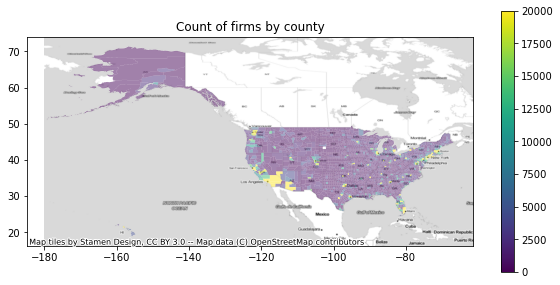

In [11]:
ax = national_map_with_firm.plot(figsize = (10,6), column = 'firm_count', 
                           vmin=0, vmax = 20000, alpha = 0.5, legend=True,
                                legend_kwds = {'shrink': 0.8})
cx.add_basemap(ax, crs = 'EPSG:4326', source = cx.providers.Stamen.TonerLite)
plt.title('Count of firms by county')
plt.savefig('plots_national/national_firm_count.png', dpi = 200)

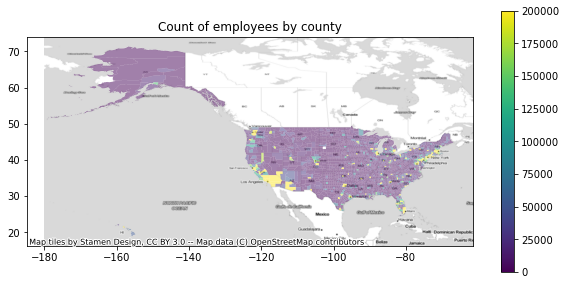

In [14]:
ax = national_map_with_firm.plot(figsize = (10,6), column = 'employment_count', 
                            vmin=0, vmax = 200000, alpha = 0.5, legend=True, 
                                 legend_kwds = {'shrink': 0.8})
cx.add_basemap(ax, crs = 'EPSG:4326',source = cx.providers.Stamen.TonerLite)
plt.title('Count of employees by county')
plt.savefig('plots_national/national_emp_count.png', dpi = 200)